<a href="https://colab.research.google.com/github/MohebZandi/Comupter_Vision/blob/main/MNIST_1400_12_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FFNs for MNIST

## MNIST Data Set

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [30]:
# import datasets

data_raw = np.loadtxt(open('sample_data/mnist_train_small.csv', 'rb'), delimiter= ',')

# extract labels
labels = data_raw[:, 0]
data = data_raw[:, 1:]

print(labels.shape)
print(data.shape)
print(labels)

In [12]:
data_raw.shape

(20000, 785)

In [ ]:
# show a few random digits
fig, axs = plt.subplots(3, 4, figsize= (10, 6))

for ax in axs.flatten():
    # pick random image
    randimg2show = np.random.randint(0, high= data.shape[0])

    # create the image (must be reshaped)
    img = np.reshape(data[randimg2show, :], (28, 28))
    ax.imshow(img, cmap= 'gray')

    # title
    ax.set_title('The number %i'%labels[randimg2show])

plt.suptitle('How humans see the data', fontsize= 20)
plt.tight_layout(rect= [0,0,1, 0.95])
plt.show()

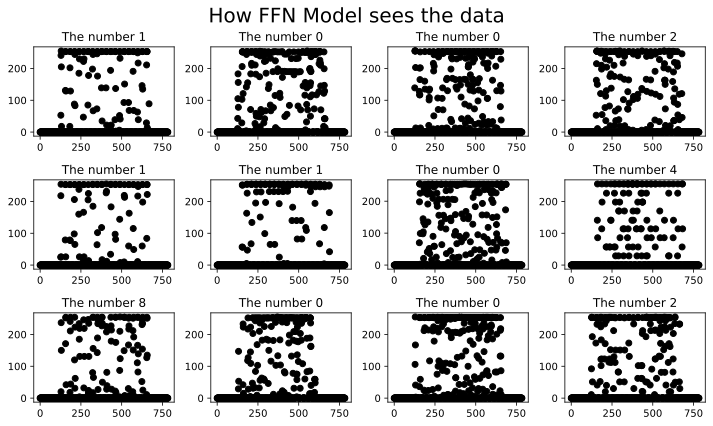

In [37]:
# show a few random digits
fig, axs = plt.subplots(3, 4, figsize= (10, 6))

for ax in axs.flatten():
    # pick random image
    randimg2show = np.random.randint(0, high= data.shape[0])

    # create image
    ax.plot(data[randimg2show,:],'ko')
    
    # title
    ax.set_title('The number %i'%labels[randimg2show])

plt.suptitle('How FFN Model sees the data', fontsize= 20)
plt.tight_layout(rect= [0,0,1, 0.95])
plt.show()

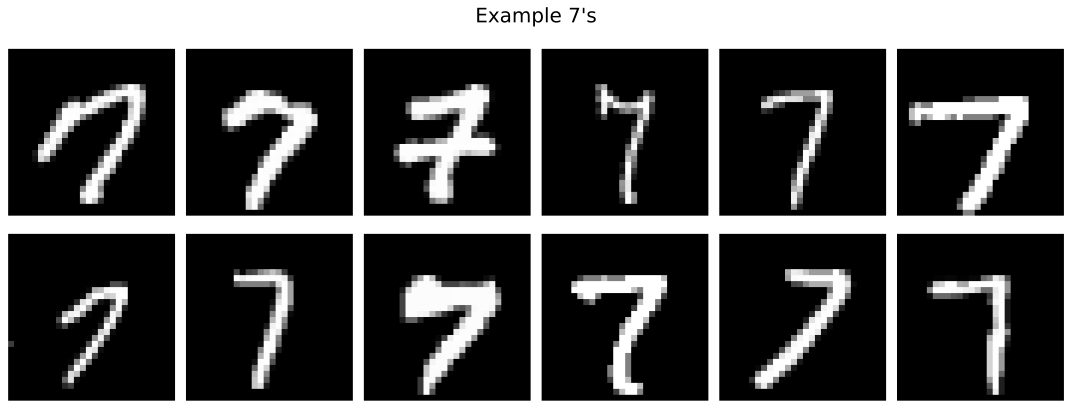

In [38]:
# let's see somr example 7s

# find indices of all the 7's in the dataset
the7s = np.where(labels == 7)[0]

# draw first 12
fig, axs = plt.subplots(2, 6, figsize= (15, 6))

for i, ax in enumerate(axs.flatten()):
    img = np.reshape(data[the7s[i], :], (28, 28))
    ax.imshow(img, cmap= 'gray')
    ax.axis('off')

plt.suptitle("Example 7's", fontsize= 20)
plt.tight_layout(rect= [0, 0, 1, 0.95])
plt.show()

(2126, 784)


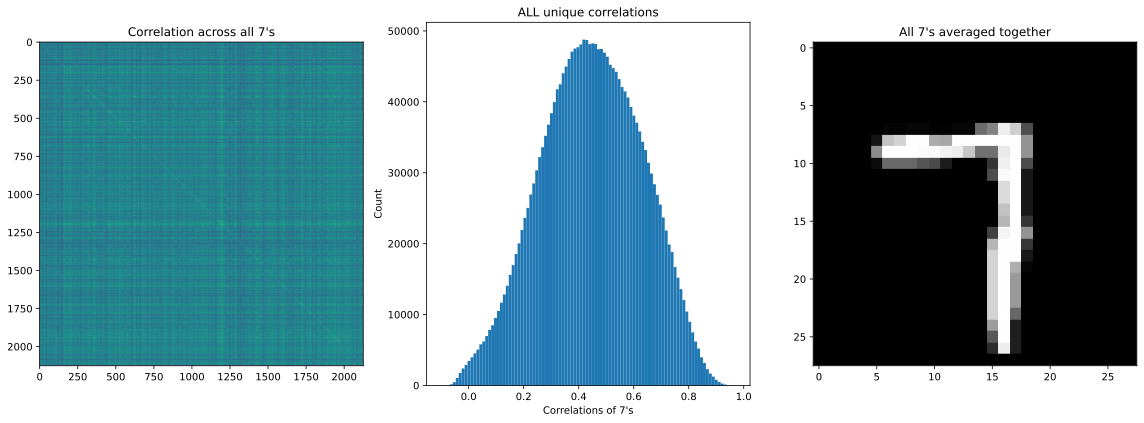

In [40]:
# how siilar are all the 7s?

# how many 7's are there?

print(data[the7s, :].shape)

# let's see how they relate to each other by computing spatial correlation
C = np.corrcoef(data[the7s, :])

# and visualize
fig, ax = plt.subplots(1, 3, figsize= (16, 6))
ax[0].imshow(C, vmin= 0, vmax= 1)
ax[0].set_title("Correlation across all 7's")

# extract the unique correlations and show as a scatter plot
uniqueCs = np.triu(C, k=1).flatten()
ax[1].hist(uniqueCs[uniqueCs != 0], bins = 100)
ax[1].set_title('ALL unique correlations')
ax[1].set_xlabel("Correlations of 7's")
ax[1].set_ylabel('Count')

# show all 7's together
aveAll7s = np.reshape(np.mean(data[the7s, :], axis= 0), (28, 28))
ax[2].imshow(img, cmap= 'gray')
ax[2].set_title("All 7's averaged together")

plt.tight_layout()
plt.show()

## Using FFN for MNIST

In [3]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [4]:
# import datasets

data_raw = np.loadtxt(open('sample_data/mnist_train_small.csv', 'rb'), delimiter= ',')

# extract labels
labels = data_raw[:, 0]
data = data_raw[:, 1:]

print(labels.shape)
print(data.shape)
print(labels)

(20000,)
(20000, 784)
[6. 5. 7. ... 2. 9. 5.]


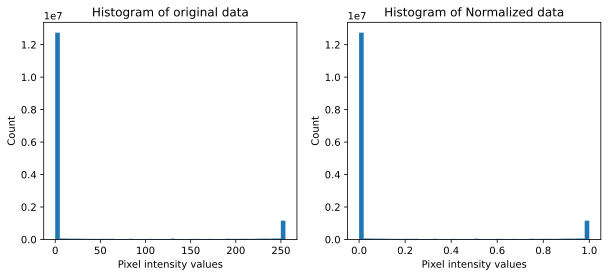

In [5]:
# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

fig, ax = plt.subplots(1, 2, figsize= (10, 4))
ax[0].hist(data.flatten(), bins = 50)
ax[0].set_title('Histogram of original data')
ax[0].set_xlabel("Pixel intensity values")
ax[0].set_ylabel('Count')

ax[1].hist(dataNorm.flatten(), bins = 50)
ax[1].set_title('Histogram of Normalized data')
ax[1].set_xlabel("Pixel intensity values")
ax[1].set_ylabel('Count')
plt.show()

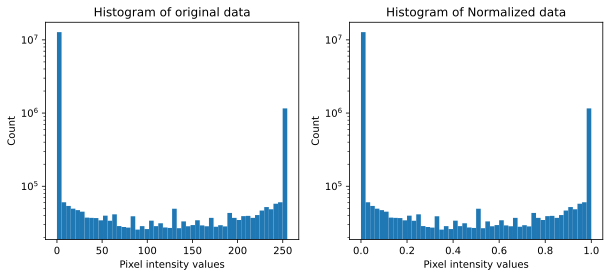

In [6]:
# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

fig, ax = plt.subplots(1, 2, figsize= (10, 4))
ax[0].hist(data.flatten(), bins = 50)
ax[0].set_title('Histogram of original data')
ax[0].set_xlabel("Pixel intensity values")
ax[0].set_ylabel('Count')
# Add a log scal to y
ax[0].set_yscale('log')

ax[1].hist(dataNorm.flatten(), bins = 50)
ax[1].set_title('Histogram of Normalized data')
ax[1].set_xlabel("Pixel intensity values")
ax[1].set_ylabel('Count')
# Add a log scal to y
ax[1].set_yscale('log')
plt.show()

**Create train / test groups using DataLoader**

In [7]:
# Step 1 : convert to tensor
dataT = torch.tensor(dataNorm).float()
labelsT = torch.tensor(labels).long()  # long = int64

# Step 2 : use scikit learn to split the data
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labelsT, test_size= 0.1)

# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Step 4: tanslate into dataloader objects
batchsize = 32
train_loader = DataLoader(train_data, batch_size= batchsize, shuffle= True, drop_last= True)
test_loader = DataLoader(test_data, batch_size= test_data.tensors[0].shape[0])

In [8]:
# check all variables in workspace
%whos

Variable           Type             Data/Info
---------------------------------------------
DataLoader         type             <class 'torch.utils.data.dataloader.DataLoader'>
F                  module           <module 'torch.nn.functio<...>/torch/nn/functional.py'>
TensorDataset      type             <class 'torch.utils.data.dataset.TensorDataset'>
ax                 ndarray          2: 2 elems, type `object`, 16 bytes
batchsize          int              32
data               ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataNorm           ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataT              Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
data_raw           ndarray          20000x785: 15700000 elems, type `float64`, 125600000 bytes (119.781494140625 Mb)
display            module           <module 'IPython.display'<...>ages/IPython/display.py'>
fig     

**Create the DL model**

In [9]:
# Create a class for the model
def createTheMNISTNet():
    class mnistNet(nn.Module):
        def __init__(self):
            super().__init__()

            # input layer
            self.input = nn.Linear(784, 64)

            # hidden layer
            self.fc1 = nn.Linear(64, 32)
            self.fc2 = nn.Linear(32, 32)

            # output layer
            self.output = nn.Linear(32, 10)
        
        # forward pass
        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            return torch.log_softmax(self.output(x), axis= 1)

    # create the model instance
    net = mnistNet()

    # loss function
    lossfun = nn.NLLLoss()    # Negative Log Likelihood Loss

    # optimizer
    optimizer = torch.optim.SGD(net.parameters(), lr= 0.01)     # SGD can be replaced with ADAM

    return net, lossfun, optimizer

In [10]:
# test the model with one batch
net, lossfun, optimizer = createTheMNISTNet()

X, y = iter(train_loader).next()
yHat = net(X)

# values are log-probability of each number (0-9)
print(yHat)

#  now let's compute the loss
loss = lossfun(yHat, y)
print()
print('Loss:')
print(loss)

tensor([[-2.3574, -2.4134, -2.3786, -2.1013, -2.2777, -2.1311, -2.3819, -2.4159,
         -2.3840, -2.2464],
        [-2.3739, -2.3991, -2.3763, -2.1026, -2.2838, -2.1377, -2.3663, -2.4228,
         -2.3666, -2.2545],
        [-2.3770, -2.4016, -2.3772, -2.1064, -2.2852, -2.1365, -2.3665, -2.4131,
         -2.3763, -2.2438],
        [-2.3786, -2.4023, -2.3830, -2.1096, -2.2783, -2.1359, -2.3664, -2.4134,
         -2.3710, -2.2450],
        [-2.3660, -2.4103, -2.3829, -2.1009, -2.2875, -2.1238, -2.3726, -2.4174,
         -2.3758, -2.2510],
        [-2.3663, -2.4122, -2.3807, -2.0976, -2.2829, -2.1398, -2.3771, -2.4026,
         -2.3975, -2.2311],
        [-2.3625, -2.4047, -2.3816, -2.1005, -2.2836, -2.1294, -2.3780, -2.4189,
         -2.3777, -2.2501],
        [-2.3644, -2.4150, -2.3840, -2.0959, -2.2824, -2.1337, -2.3735, -2.4046,
         -2.3872, -2.2471],
        [-2.3539, -2.4176, -2.3841, -2.0888, -2.2726, -2.1485, -2.3705, -2.3952,
         -2.3864, -2.2671],
        [-2.3563, -

In [11]:
def function2trainTheModel():

    # number of epochs
    numepochs = 60

    # create a new model
    net, lossfun, optimizer = createTheMNISTNet()

    # initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # loop over epochs
    for epochi in range(numepochs):       # loop over epochs
        # loop iver training data batches 
        batchAcc = []
        batchLoss = []

        for X, y in train_loader:       # loop over the batches

            # forward pass and loss
            yHat = net(X)
            loss = lossfun(yHat, y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())

            # compute accuracy
            matches = torch.argmax(yHat, axis= 1) ==y       # booleans (false/ true)
            matchesNumeric = matches.float()                # convert to numbers (0/1)
            accuracyPct = 100 * torch.mean(matchesNumeric)  # Average and x100
            batchAcc.append(accuracyPct)                    # add to list of accuracies
        # end of batch loop...

        # now that we've trained the batches , get their average training accuracy
        trainAcc.append(np.mean(batchAcc))

        # and get average losses across the batches
        losses[epochi] = np.mean(batchLoss)

        # test accuracy
        X, y = next(iter(test_loader))      # extract X, y from test dataloader
        yHat = net(X)

        # compare the following really long line of code to the training accuracy lines
        testAcc.append(100* torch.mean((torch.argmax(yHat, axis=1 )==y).float()))

        # end epoch

    # function output
    return trainAcc, testAcc, losses, net

In [12]:
trainAcc, testAcc, losses, net = function2trainTheModel()

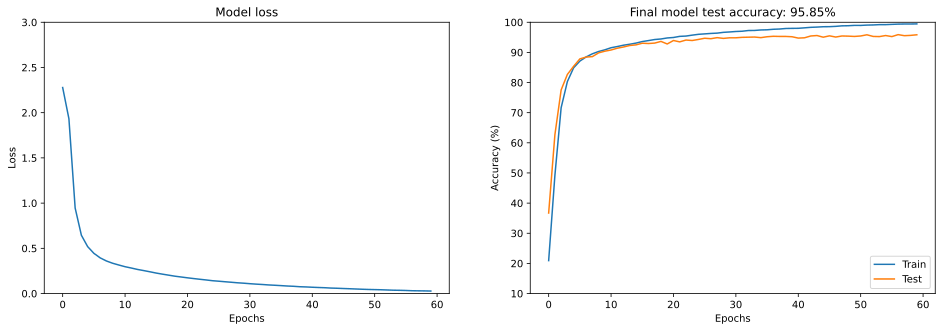

In [13]:
fig, ax = plt.subplots(1, 2, figsize= (16, 5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0, 3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc, label = 'Train')
ax[1].plot(testAcc, label= 'Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10, 100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

In [14]:
# run the model through for the test data
X,y = next(iter(test_loader))
predictions = net(X).detach()

predictions

tensor([[-1.3640e+01, -2.2316e+01, -1.5447e+01,  ..., -1.1064e-02,
         -1.3102e+01, -4.5099e+00],
        [-1.4567e+01, -1.9540e-03, -6.4012e+00,  ..., -8.9230e+00,
         -8.7635e+00, -1.9858e+01],
        [-2.9418e+01, -1.7694e+01, -2.6716e+01,  ..., -2.3884e+01,
         -1.5407e+01, -1.5179e+01],
        ...,
        [-1.8358e-05, -3.7569e+01, -1.1213e+01,  ..., -1.8922e+01,
         -1.2217e+01, -1.7697e+01],
        [-2.6153e+01, -2.6308e+01, -2.8920e+01,  ..., -1.2024e+01,
         -1.4909e+01, -6.1265e+00],
        [-2.4395e+01, -2.8028e+01, -3.0064e+01,  ..., -1.7375e+01,
         -1.6848e+01, -1.5242e+01]])

In [15]:
# convert predictions to probability

torch.exp(predictions)

tensor([[1.1924e-06, 2.0336e-10, 1.9570e-07,  ..., 9.8900e-01, 2.0420e-06,
         1.1000e-02],
        [4.7145e-07, 9.9805e-01, 1.6596e-03,  ..., 1.3328e-04, 1.5634e-04,
         2.3751e-09],
        [1.6748e-13, 2.0675e-08, 2.4975e-12,  ..., 4.2387e-11, 2.0371e-07,
         2.5577e-07],
        ...,
        [9.9998e-01, 4.8301e-17, 1.3491e-05,  ..., 6.0557e-09, 4.9438e-06,
         2.0614e-08],
        [4.3839e-12, 3.7532e-12, 2.7569e-13,  ..., 5.9961e-06, 3.3517e-07,
         2.1842e-03],
        [2.5435e-11, 6.7230e-13, 8.7756e-14,  ..., 2.8447e-08, 4.8189e-08,
         2.4014e-07]])

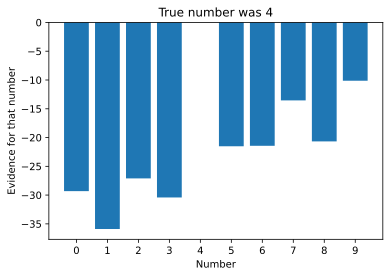

In [17]:
# Evidence for all numbers from one sample
sample2show = 121

plt.bar(range(10),predictions[sample2show]) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' %y[sample2show].item())
plt.show()

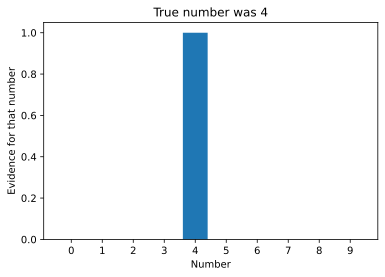

In [18]:
# above chart with probablity not log
# Evidence for all numbers from one sample
sample2show = 121

plt.bar(range(10),torch.exp(predictions[sample2show])) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' %y[sample2show].item())
plt.show()

[  14   18   24  146  169  178  256  262  309  368  379  385  395  404
  446  486  508  539  566  576  582  715  721  733  740  774  780  809
  827  846  850  882  894  909  961 1045 1049 1053 1054 1142 1157 1164
 1172 1185 1196 1204 1222 1235 1247 1255 1260 1269 1301 1309 1321 1322
 1336 1367 1385 1433 1443 1457 1486 1493 1509 1517 1523 1542 1565 1641
 1671 1710 1729 1770 1810 1825 1851 1902 1910 1914 1933 1943 1983]


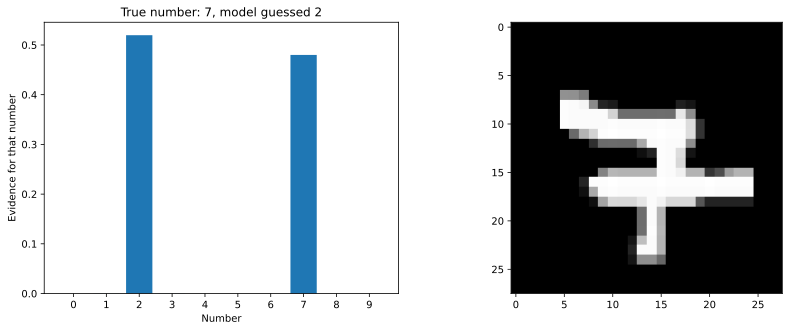

In [25]:
# find the errors
errors = np.where( torch.max(predictions,axis=1)[1] != y )[0]
print(errors)

# Evidence for all numbers from one sample
sample2show = 1

fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].bar(range(10),np.exp(predictions[errors[sample2show]]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')
ax[0].set_title('True number: %s, model guessed %s' 
                %( y[errors[sample2show]].item(), torch.argmax(predictions[errors[sample2show]]).item() ))

ax[1].imshow( np.reshape(X[errors[sample2show],:],(28,28)) ,cmap='gray')

plt.show()